In [ ]:
# Using env py27_cox_nb

http://lifelines.readthedocs.io/en/latest/Quickstart.html
## Quickstart



In [15]:
%matplotlib inline
#import matplotlib as plt
import matplotlib.pyplot as plt
import numpy as np

### Kaplan-Meier and Nelson-Aalen
```Let’s start by importing some data. We need the durations that individuals are observed for, and whether they “died” or not.```


In [2]:
from lifelines.datasets import load_waltons
df = load_waltons() # returns a Pandas DataFrame

T = df['T']
E = df['E']

print df.head()

      T  E    group
0   6.0  1  miR-137
1  13.0  1  miR-137
2  13.0  1  miR-137
3  13.0  1  miR-137
4  19.0  1  miR-137


```T is an array of durations, E is a either boolean or binary array representing whether the “death” was observed (alternatively an individual can be censored).```


In [3]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
kmf.fit(T, event_observed=E)  # or, more succiently, kmf.fit(T, E)

<lifelines.KaplanMeierFitter: fitted with 163 observations, 7 censored>

```After calling the fit method, we have access to new properties like survival_function_ and methods like plot(). The latter is a wrapper around Panda’s internal plotting library.```

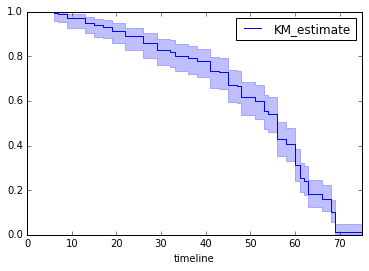

In [4]:
kmf.survival_function_
kmf.median_
kmf.plot()


## Multiple groups


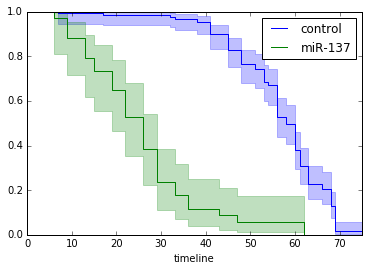

In [5]:
groups = df['group']
ix = (groups == 'miR-137')

kmf.fit(T[~ix], E[~ix], label='control')
ax = kmf.plot()

kmf.fit(T[ix], E[ix], label='miR-137')
kmf.plot(ax=ax)

## Getting Data in The Right Format

```Often you’ll have data that looks like:
start_time, end_time
Lifelines has some utility functions to transform this dataset into duration and censorship vectors:```

```python
from lifelines.utils import datetimes_to_durations

# start_times is a vector of datetime objects
# end_times is a vector of (possibly missing) datetime objects.
T, E = datetimes_to_durations(start_times, end_times, freq='h')
```
```Alternatively, perhaps you are interested in viewing the survival table given some durations and censorship vectors.```





In [20]:
from lifelines.utils import survival_table_from_events

table = survival_table_from_events(T, E)
print table.head()

          removed  observed  censored  entrance  at_risk
event_at                                                
0.0             0         0         0       163      163
6.0             1         1         0         0      163
7.0             2         1         1         0      162
9.0             3         3         0         0      160
13.0            3         3         0         0      157


## Survival Regression
```While the above KaplanMeierFitter and NelsonAalenFitter are useful, they only give us an “average” view of the population. Often we have specific data at the individual level, either continuous or categorical, that we would like to use. For this, we turn to survival regression, specifically AalenAdditiveFitter and CoxPHFitter.```




In [21]:
from lifelines.datasets import load_regression_dataset
regression_dataset = load_regression_dataset()

regression_dataset.head()

,var1,var2,var3,T,E
0,0.595170,1.143472,1.571079,14.785479,1
1,0.209325,0.184677,0.356980,7.336734,1
2,0.693919,0.071893,0.557960,5.271527,1
3,0.443804,1.364646,0.374221,11.684168,1
4,1.613324,0.125566,1.921325,7.637764,1


```The input of the fit method’s API in a regression is different. All the data, including durations, censorships and covariates must be contained in a Pandas DataFrame (yes, it must be a DataFrame). The duration column and event occured column must be specified in the call to fit.```

In [7]:
from lifelines import CoxPHFitter

# Using Cox Proportional Hazards model
cph = CoxPHFitter()
cph.fit(regression_dataset, 'T', event_col='E')
cph.print_summary()


n=200, number of events=189

       coef  exp(coef)  se(coef)      z      p  lower 0.95  upper 0.95    
var1 0.2213     1.2477    0.0743 2.9796 0.0029      0.0757      0.3669  **
var2 0.0509     1.0522    0.0829 0.6139 0.5393     -0.1116      0.2134    
var3 0.2186     1.2443    0.0758 2.8836 0.0039      0.0700      0.3672  **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 

Concordance = 0.580


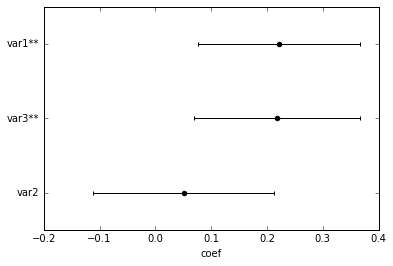

In [8]:
cph.plot()

```To access the coefficients and the baseline hazard, you can use cph.hazards_ and cph.baseline_hazard_ respectively. After fitting, you can use use the suite of prediction methods (similar to Aalen’s additve model above): .predict_partial_hazard, .predict_survival_function, etc.```


Link to [Chapter 2](Survival%20Analysis%20ch%202.ipynb)